In [34]:
# import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, make_scorer
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [35]:
# age               : Int
# education         : Categorical
# education level   : Int
# marital status    : Categorical
# Occupation        : Catagorical
# relationship      : Categorical
# race              : Categorical
# sex               : Categorical
# Investment profit : Int, but almost all 0
# Investment loss   : Int, but almost all 0
# hours per week    : Int
# native country    : Categorical
# income            : Conditional (e.g. <=50k, >50k)

In [36]:
df = pd.read_csv('data/survey.csv')
df = df.drop(columns=['Investment profit', 'Investment loss'])

# Encoding
LabelEncoders = {}
for col in df.columns:
    if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        LabelEncoders[col] = le

def make_submit(df: pd.DataFrame, file_name: str) -> None:
    submit = pd.DataFrame()
    submit['ID'] = df.index
    submit['Employment Type'] = df['Employment Type']
    submit.to_csv(f'{file_name}.csv', index=False)

# k-means

In [37]:
def find_best_k(df: pd.DataFrame, k_range: range) -> None:
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        print(f'k={k}, silhouette_score={silhouette_score(df, kmeans.labels_)}')

def learn_kmeans(df: pd.DataFrame, k: int) -> KMeans:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    return kmeans

# find_best_k(df, range(2, 10))
# kmeans = learn_kmeans(df, 5)
# make_submit(kmeans, 'submit_kmeans')

# DBSCANS

In [ ]:
# scoring = silhouette_score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)  # Fit and predict cluster labels
    return silhouette_score(X, labels)  # Calculate silhouette score
# Create a scorer for GridSearchCV
scorer = make_scorer(silhouette_scorer, greater_is_better=True)

params = {
    'eps': range(1, 10),
    'min_samples': range(3, 10)
}
grid = GridSearchCV(DBSCAN(), params, scoring=scorer, n_jobs=-1, cv=3)
grid.fit(df)

labels = grid.best_estimator_.fit_predict(df)

# 노이즈를 별도 클러스터로 처리
noise_cluster_label = max(labels) + 1
labels[labels == -1] = noise_cluster_label
labelsdf = pd.DataFrame(labels, columns=['Employment Type'])
make_submit(labelsdf, 'submit_dbscan')


print(grid.best_params_)
# dbscan = DBSCAN(**grid.best_params_)


c:\Users\carot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'eps': 1, 'min_samples': 3}


# Dimension reduction

NameError: name 'reducted_df' is not defined

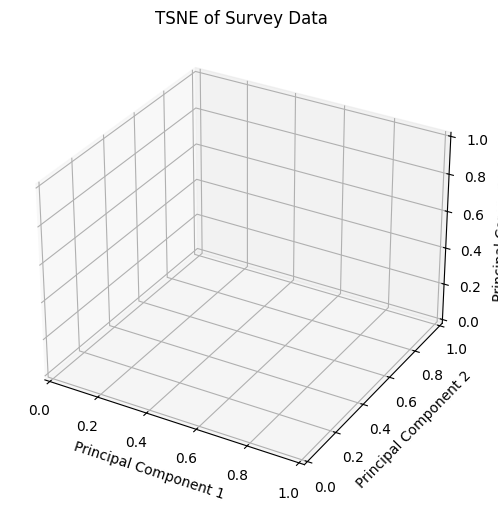

In [39]:
# # Perform PCA or TSNE
# reducted = TSNE(n_components=3)
# principal_components = reducted.fit_transform(df)

# reducted_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# # 2D Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(reducted_df['PC1'], reducted_df['PC2'], c=kmeans.labels_, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('TSNE of Survey Data')
# plt.colorbar(label='Cluster Label')
# plt.show()

# # 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('TSNE of Survey Data')
scatter = ax.scatter(reducted_df['PC1'], reducted_df['PC2'], reducted_df['PC3'], c=dbscan.labels_, cmap='viridis')
fig.colorbar(scatter, label='Cluster Label')
plt.show()